In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [5]:
df['Ano_Venda'] = df['Data'].dt.year

In [6]:
df['Vendas'].fillna(0, inplace=True)

In [7]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

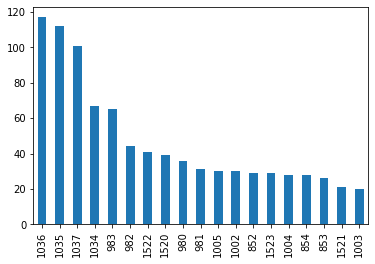

In [8]:
df['LojaID'].value_counts(ascending=False).plot.bar();

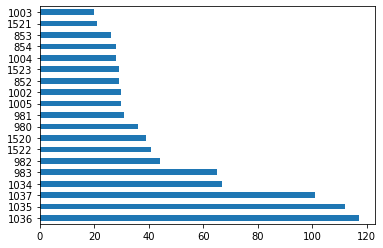

In [9]:
df['LojaID'].value_counts().plot.barh();

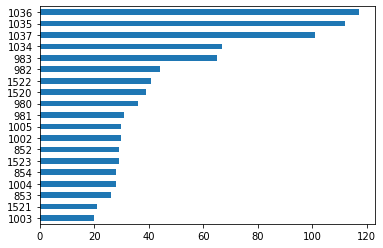

In [10]:
df['LojaID'].value_counts(ascending=True).plot.barh();

In [11]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

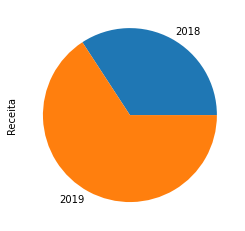

In [12]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [13]:
# Total sales by city
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

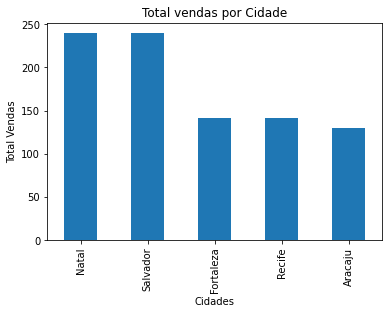

In [14]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidades')
plt.ylabel('Total Vendas');

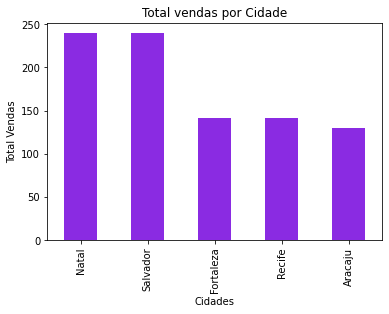

In [15]:
# Change color https://matplotlib.org/stable/gallery/color/named_colors.html
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='blueviolet')
plt.xlabel('Cidades')
plt.ylabel('Total Vendas');

In [16]:
# Change style https://matplotlib.org/stable/index.html
plt.style.use('ggplot')

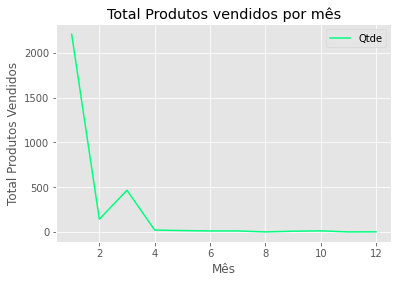

In [17]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos por mês', color='springgreen')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [18]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [19]:
df_2019 = df[df['Ano_Venda'] == 2019]

In [20]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

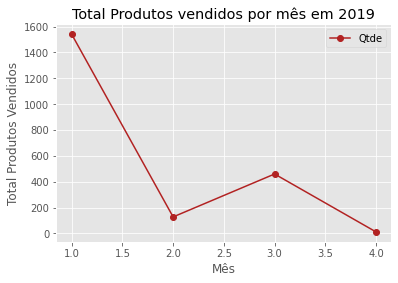

In [21]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos por mês em 2019', marker = 'o', color='firebrick')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

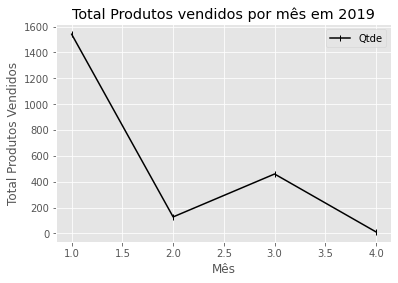

In [22]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos por mês em 2019', marker = '|', color='black')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

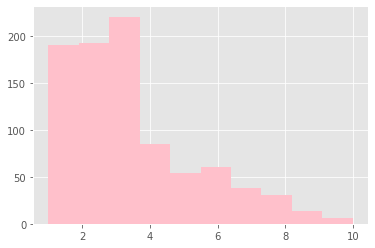

In [23]:
plt.hist(df['Qtde'], color='pink');

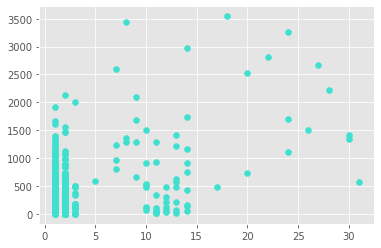

In [24]:
plt.scatter(color='turquoise', x=df_2019['dia_venda'], y = df_2019['Receita']);

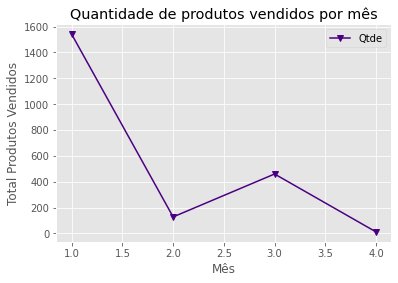

In [25]:
#Save in png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v', color='indigo')
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig('grafico_qtde_por_mes.png')